  **Machine Learning Final Project: Prediction of Rheumatoid Arthritis using DNA Methylation Data** 


This is a machine learning project aimed at predicting Rheumatoid Arthritis (RA) utilizing advanced analysis of DNA methylation datasets. Rheumatoid Arthritis is a complex autoimmune disease characterized by chronic inflammation and joint damage, affecting millions worldwide. By harnessing the power of cutting-edge machine learning algorithms, we seek to uncover intricate patterns within DNA methylation data, a key epigenetic mechanism implicated in RA pathogenesis.

* **Dataset**

Genome-wide DNA methylation data extracted from peripheral blood leukocytes (PBLs). Samples, categorized as Rheumatoid arthritis patients or normal controls, provide the basis for  analysis. https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse42861

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
cd '/content/drive/MyDrive/606 ML Project/'

/content/drive/MyDrive/606 ML Project



In order to handle the dataset effectively, which is provided in the form of a pickle file, we will be incorporating the Python library **pickle5** into our project. The utilization of this library will enable seamless reading and manipulation of the dataset, ensuring smooth data preprocessing and analysis stages within our machine learning pipeline

In [ ]:
!pip3 install pickle5
import pickle5 as pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255320 sha256=f692798d97018577d7289df61bb7bfeab8079938d4e392bc76854b1032ef590d
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


# Load DNAm data


In [ ]:
# Read in  DNA data, a pickle data
infile = open('GSE42861.pkl','rb')
DNA_data= pickle.load(infile)
infile.close()

In [ ]:
DNA_data.head(2)

,dataset,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,cg14156381,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
GSM1051525,GSE42861,67.0,F,0.34637,0.177525,0.073021,0.818903,0.167119,0.096741,0.431846,...,0.121812,0.204383,0.867147,0.235479,0.836472,0.793045,0.067196,0.072223,0.083744,0.265790
GSM1051526,GSE42861,49.0,F,0.36717,0.183482,0.084641,0.850975,0.251110,0.074172,0.456439,...,0.100869,0.197570,0.865686,0.230336,0.858362,0.798864,0.072268,0.069718,0.096331,0.283381


In [ ]:
DNA_data.shape

(689, 18613)

In [ ]:
DNA_data.columns

Index(['dataset', 'age', 'gender', 'cg04601137', 'cg10064162', 'cg17559549',
       'cg12441964', 'cg21493583', 'cg27318546', 'cg14156381',
       ...
       'cg06291595', 'cg06521852', 'cg24024214', 'cg25148589', 'cg20692181',
       'cg21207436', 'cg15299721', 'cg00884221', 'cg27638672', 'cg05593325'],
      dtype='object', length=18613)

# Load metadata
#### The metadata offers information for subject descriptions. You can utilize some features to enhance your model training.

In [ ]:
# Read in  DNA data, a pickle data
infile = open('GSE42861_metadata_2023.pkl','rb')
DNA_metadata= pickle.load(infile)
infile.close()

In [ ]:
DNA_metadata.head(10)

,GEO Accession,Disease State,Subject,Age,Gender,Smoking Status
GSM1051525,GSM1051525,rheumatoid arthritis,Patient,67,f,current
GSM1051526,GSM1051526,rheumatoid arthritis,Patient,49,f,current
GSM1051527,GSM1051527,rheumatoid arthritis,Patient,53,f,ex
GSM1051528,GSM1051528,rheumatoid arthritis,Patient,62,f,current
GSM1051529,GSM1051529,rheumatoid arthritis,Patient,33,f,never
GSM1051530,GSM1051530,rheumatoid arthritis,Patient,59,f,current
GSM1051531,GSM1051531,rheumatoid arthritis,Patient,66,f,never
GSM1051532,GSM1051532,rheumatoid arthritis,Patient,51,f,ex
GSM1051533,GSM1051533,Normal,Normal,55,m,current
GSM1051534,GSM1051534,Normal,Normal,37,m,never


# DNA_metadata Description
*   GEO Accession: Subject ID
*   Disease State: **the disease name** or  **Normal**
*   Subject: **Patient** or **Normal**
*   Age: age of the subject
*   Gender: **f** or **m**, we can ignore this feature in this project.
*   Smoking State:

      ex: previously smoked

      current: currently smoking

      never: no history of smoking
      
      occasional: occational smoking



In [ ]:
DNA_metadata.shape

(689, 6)

## EDA

**checking missing values of both data set**

In [ ]:
DNA_metadata.isna().sum()

GEO Accession     0
Disease State     0
Subject           0
Age               0
Gender            0
Smoking Status    0
dtype: int64

In [ ]:
DNA_data.isna().sum()

dataset       0
age           0
gender        0
cg04601137    0
cg10064162    0
             ..
cg21207436    0
cg15299721    0
cg00884221    0
cg27638672    0
cg05593325    0
Length: 18613, dtype: int64

In [ ]:
DNA_data.columns[DNA_data.isna().any()]

Index([], dtype='object')

**check data types**

In [ ]:
DNA_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, GSM1051525 to GSM1052213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO Accession   689 non-null    object
 1   Disease State   689 non-null    object
 2   Subject         689 non-null    object
 3   Age             689 non-null    object
 4   Gender          689 non-null    object
 5   Smoking Status  689 non-null    object
dtypes: object(6)
memory usage: 37.7+ KB


In [ ]:
DNA_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, GSM1051525 to GSM1052213
Columns: 18613 entries, dataset to cg05593325
dtypes: float64(18611), object(2)
memory usage: 97.8+ MB


**convert age to integer**

In [ ]:
DNA_metadata['Age'] = DNA_metadata['Age'].astype(int)

In [ ]:
DNA_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 689 entries, GSM1051525 to GSM1052213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO Accession   689 non-null    object
 1   Disease State   689 non-null    object
 2   Subject         689 non-null    object
 3   Age             689 non-null    int64 
 4   Gender          689 non-null    object
 5   Smoking Status  689 non-null    object
dtypes: int64(1), object(5)
memory usage: 37.7+ KB


**visualize distribution of disease state**

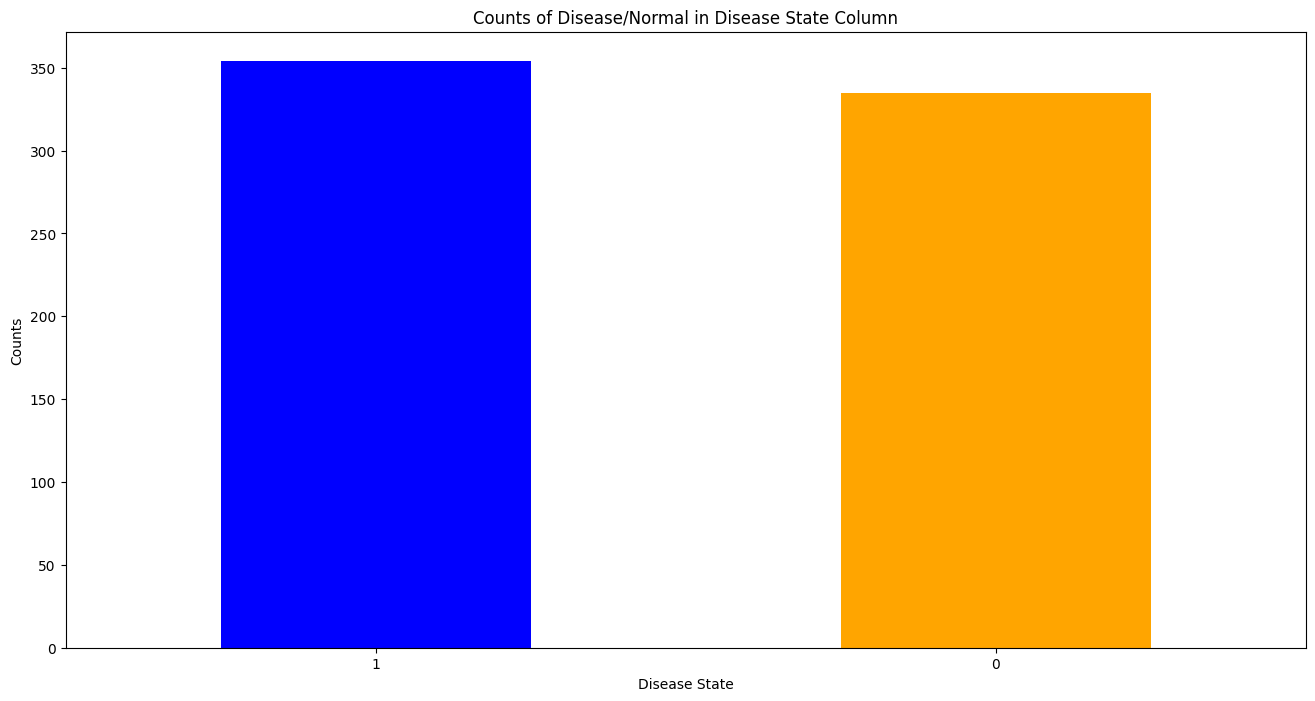

In [ ]:
target_counts = DNA_metadata['Disease State'].value_counts()
target_counts.plot(kind='bar', color=['blue', 'orange'])  # Plotting the bar chart
plt.title("Counts of Disease/Normal in Disease State Column")  # Set the title
plt.xlabel("Disease State")  # Set the x-axis label
plt.ylabel("Counts")  # Set the y-axis label
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

**this dataset is pretty well balanced**

categorising patients using smoking status

In [ ]:
patient=DNA_metadata.groupby(['Smoking Status','Disease State']) ['Disease State'].count()
patient

Smoking Status  Disease State       
current         Normal                   89
                rheumatoid arthritis    111
ex              Normal                  108
                rheumatoid arthritis    120
na              Normal                    2
never           Normal                  101
                rheumatoid arthritis     92
occasional      Normal                   35
                rheumatoid arthritis     31
Name: Disease State, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

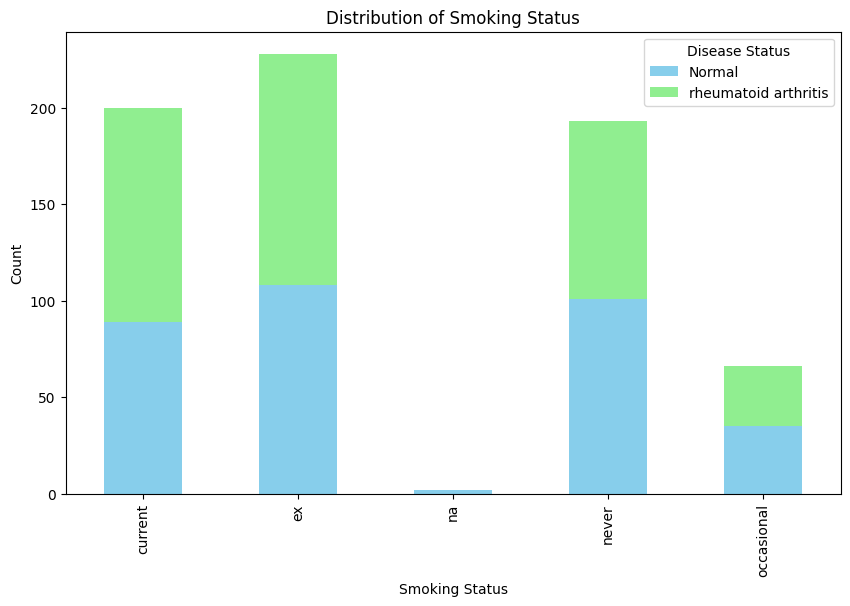

In [ ]:
plot_data = patient.unstack()
colors = ['skyblue', 'lightgreen']
plot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status')
plt.legend(title='Disease Status')
plt.show()

only 2 occurences of smoking status are na (these are probably essentially null values, we will drop these later once we combine the data and metadata together before training)

**categorising patients using gender status**

In [ ]:
gender=DNA_metadata.groupby(['Gender','Disease State']) ['Disease State'].count()
gender

Gender  Disease State       
f       Normal                  239
        rheumatoid arthritis    253
m       Normal                   96
        rheumatoid arthritis    101
Name: Disease State, dtype: int64

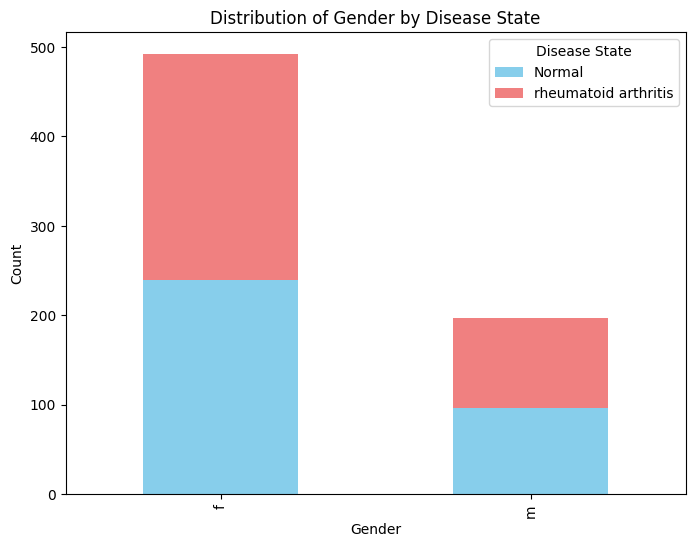

In [ ]:
plot_data = gender.unstack()
colors=['skyblue', 'lightcoral']
plot_data.plot(kind='bar', stacked=True, figsize=(8, 6),color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender by Disease State')
plt.legend(title='Disease State')
plt.show()

**categorising patients using age group**

In [ ]:
age=DNA_metadata.groupby(['Age','Disease State']) ['Disease State'].count()
age

Age  Disease State       
18   rheumatoid arthritis     1
19   rheumatoid arthritis     2
20   Normal                   3
21   rheumatoid arthritis     2
22   Normal                   1
                             ..
68   Normal                  10
     rheumatoid arthritis    11
69   Normal                  13
     rheumatoid arthritis     6
70   Normal                   4
Name: Disease State, Length: 96, dtype: int64

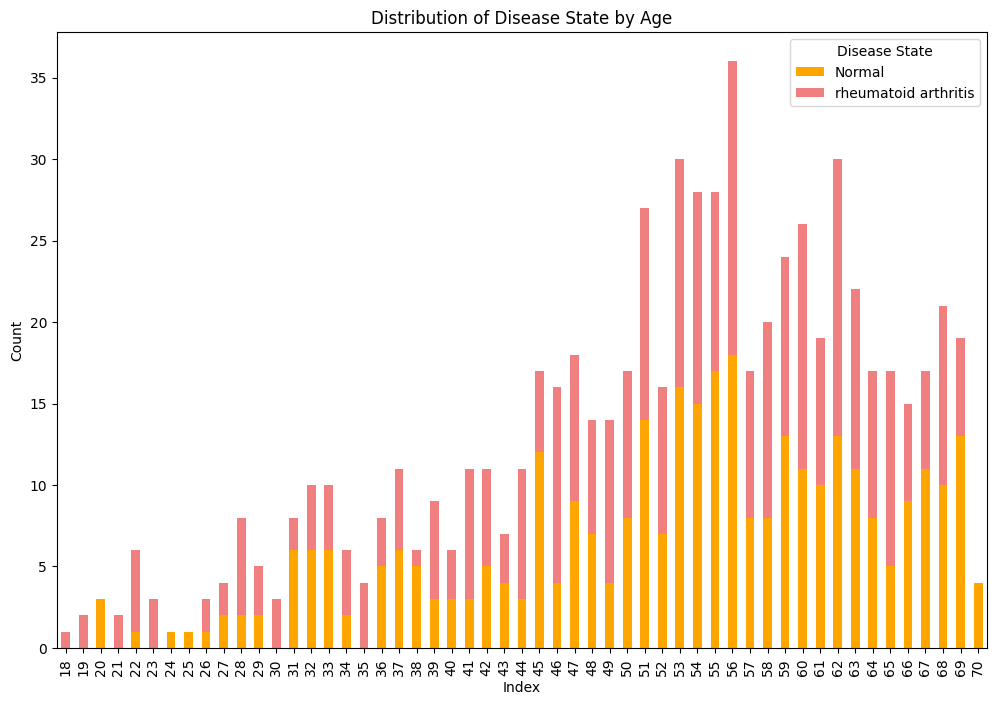

In [ ]:
plot_data = age.unstack()
plot_data.plot(kind='bar', stacked=True, figsize=(12, 8), color = ['orange', 'lightcoral'])
plt.xlabel('Index')
plt.ylabel('Count')
plt.title('Distribution of Disease State by Age')
plt.legend(title='Disease State')
plt.show()

In [ ]:
def explore_effect_on_disease_state(feature, lab_rot, colors):
  import matplotlib.pyplot as plt
  import numpy as np
  plt.rcParams['figure.figsize'] = (16,8)
  #Plot Distribution
  DNA_metadata.groupby([feature,'Disease State']).size().unstack().plot(kind='bar', stacked=True, title=f'Distribution of Subjects by {feature}', ylabel='# of Subjects', color = colors)
  #Plot Proportional Effect on Disease State
  # create dataframe with proportions
  x = pd.crosstab(DNA_metadata[feature], DNA_metadata['Disease State'])
  pro = x.div(x.sum(axis=1), axis=0)

  # plot
  ax = pro.plot(kind='bar', stacked=False, color=colors)

  # move legend
  ax.legend(title='Disease State', bbox_to_anchor=(1, 1.01), loc='upper left')

  # column names from per used to get the column values from df
  cols = pro.columns

  # iterate through each group of containers and the corresponding column name
  for c, col in zip(ax.containers, cols):

      # get the values for the column from df
      vals = x[col]

      # create a custom label for bar_label
      labels = [f'{h*100:.1f}%' if (h := v.get_height()) > 0 else '' for v, val in zip(c, vals)]

      # annotate each section with the custom labels
      ax.bar_label(c, labels=labels, label_type='edge',rotation=0, fontweight='bold')
  plt.title(f'Effect of {feature} on Disease State')
  plt.xticks(rotation=lab_rot)
  plt.ylabel('Proportion')
  plt.show()

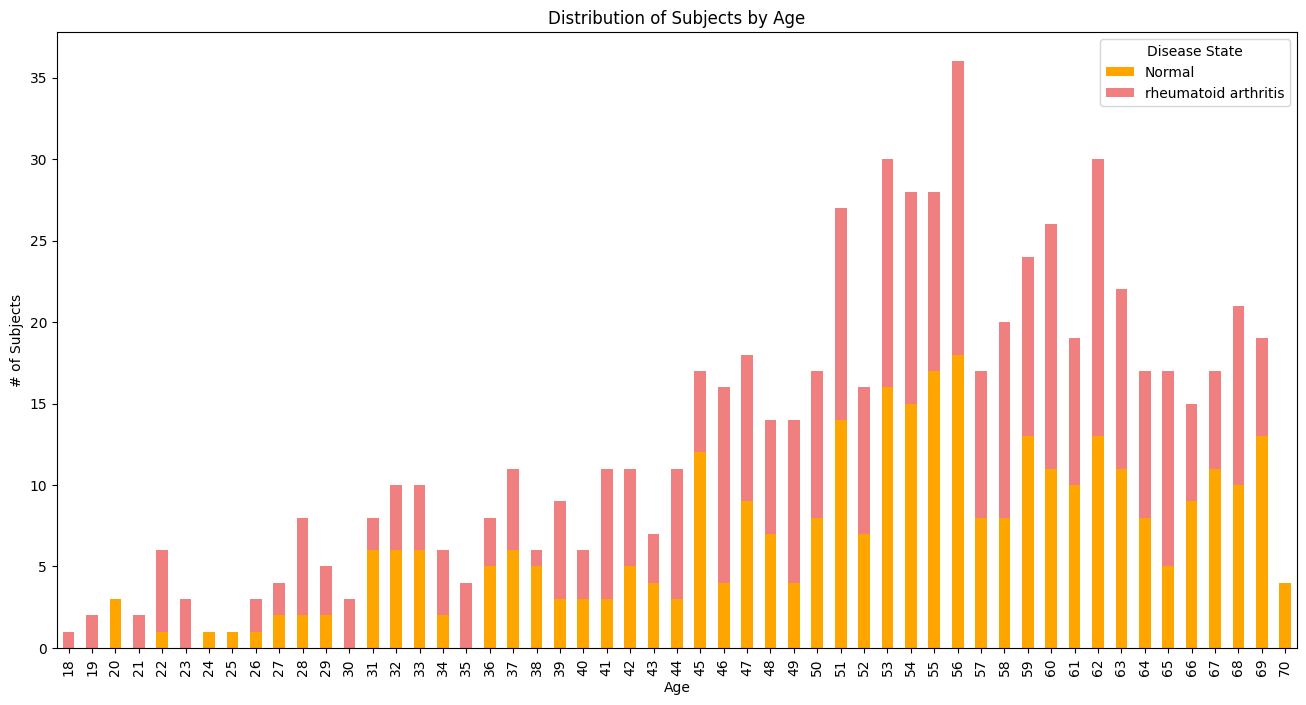

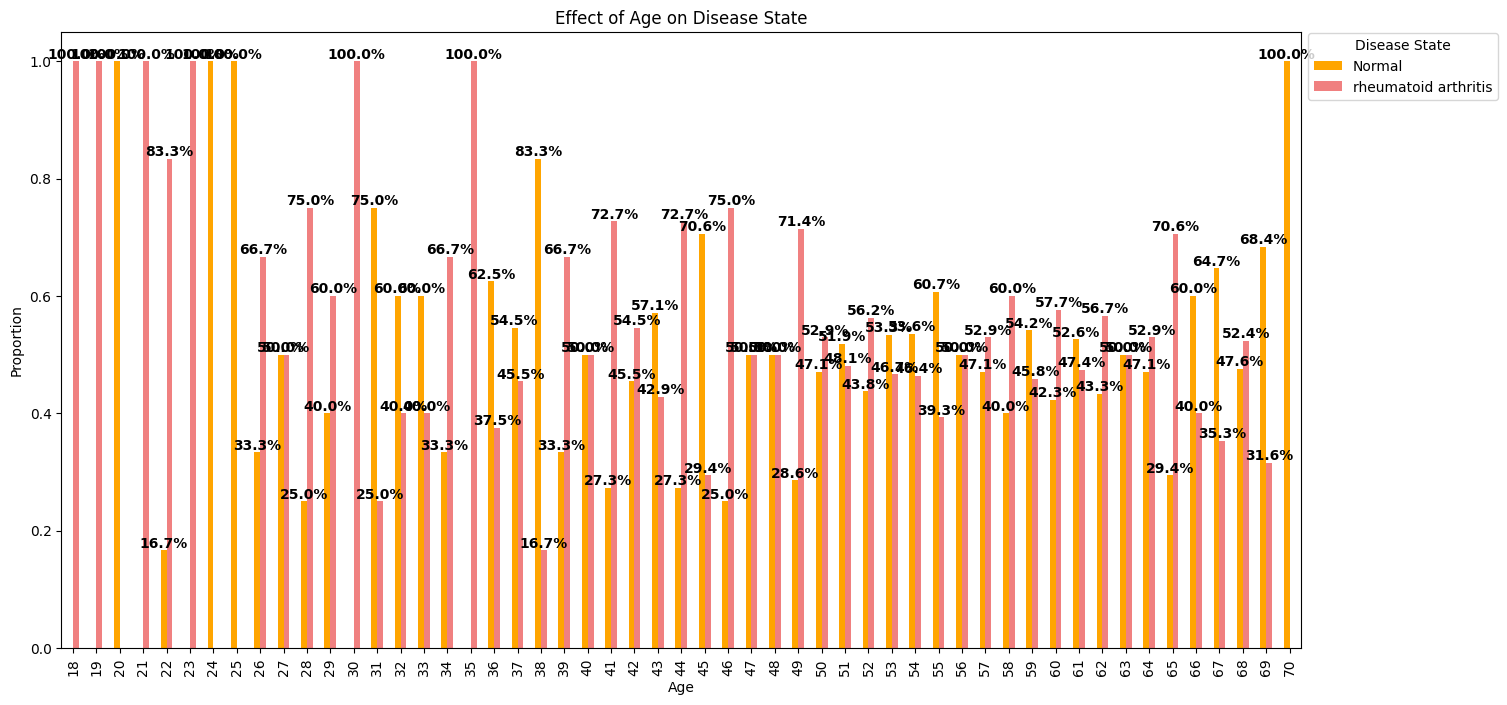

In [ ]:
explore_effect_on_disease_state('Age', 90, ['orange','lightcoral'])

**Group Age for better visualization**

In [ ]:
DNA_metadata.Age.dtype

dtype('int64')

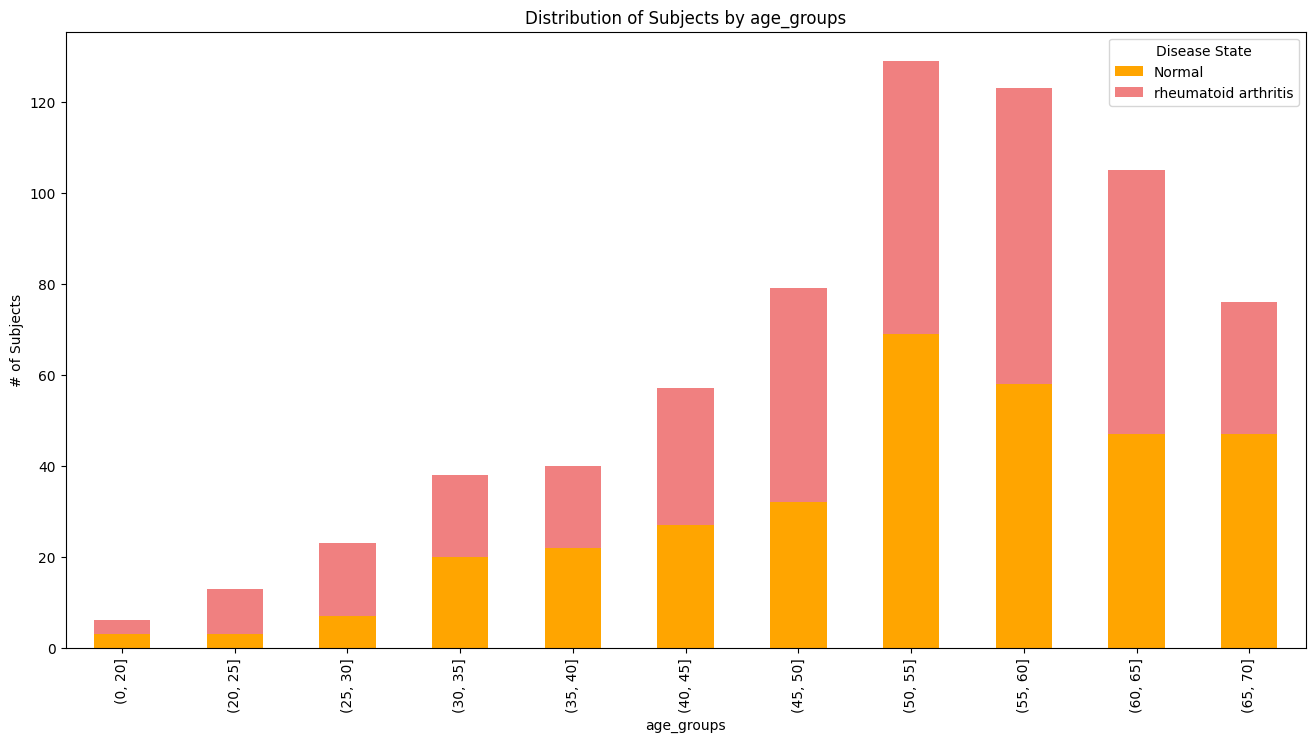

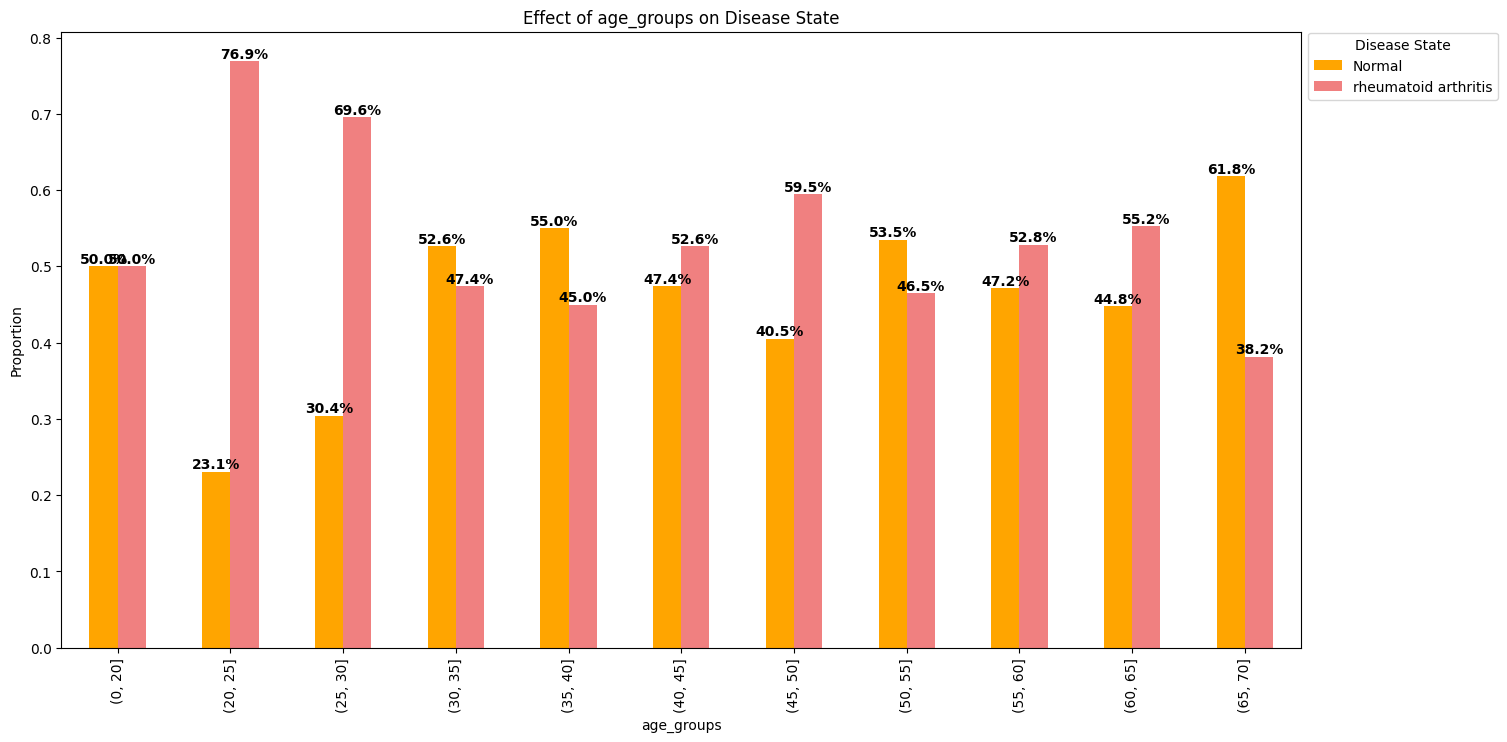

In [ ]:
DNA_metadata['age_groups'] = pd.cut(DNA_metadata['Age'], [0,20,25,30,35,40,45,50,55,60,65,70])
explore_effect_on_disease_state('age_groups',90, ['orange','lightcoral'])

**Check for Outliers**

In [ ]:
fig=px.box(DNA_metadata,y='Age',points='outliers', title='Outliers in Age')
#plt.rcParams['figure.figsize'] = (8, 5)
fig.update_layout(autosize=False, width=600, height=600, hovermode='x',)

**count number of outliers**

In [ ]:
len(DNA_metadata[DNA_metadata['Age'] < 21])

6

In [ ]:
DNA_metadata['Age'].describe()

count    689.000000
mean      51.930334
std       11.795659
min       18.000000
25%       45.000000
50%       54.000000
75%       61.000000
max       70.000000
Name: Age, dtype: float64

**check for outliers in columns of DNA_data dataframe**

In [ ]:
def find_columns_with_outliers(dataframe):
    columns_with_outliers = []
    number_of_outliers = []
    number_of_extreme_outliers = []
    lower_bounds = []
    extreme_lower_bounds = []
    upper_bounds = []
    extreme_upper_bounds = []

    # Iterating through each column in the DataFrame
    for column in dataframe.columns:
        # Ignoring non-numeric columns
        if dataframe[column].dtype != 'object':  # Checking if the column is numeric
            Q1 = dataframe[column].quantile(0.25)
            Q3 = dataframe[column].quantile(0.75)
            IQR = Q3 - Q1

            # Determining outliers using the IQR method
            lower_bound = Q1 - 1.5 * IQR
            extreme_lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 1.5 * IQR
            extreme_upper_bound = Q3 + 3 * IQR

            # Checking for outliers in the column
            outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
            if len(outliers) > 0:
                columns_with_outliers.append(column)
                number_of_outliers.append(len(outliers))
                lower_bounds.append(lower_bound)
                upper_bounds.append(upper_bound)

                extreme_outliers = dataframe[(dataframe[column] < extreme_lower_bound) | (dataframe[column] > extreme_upper_bound)]
                number_of_extreme_outliers.append(len(extreme_outliers))
                extreme_lower_bounds.append(extreme_lower_bound)
                extreme_upper_bounds.append(extreme_upper_bound)

    columns_with_outliers = pd.Series(columns_with_outliers,name='columns_with_outliers')
    number_of_outliers = pd.Series(number_of_outliers, name='number_of_outliers')
    number_of_extreme_outliers = pd.Series(number_of_extreme_outliers, name='number_of_extreme_outliers')
    lower_bounds =pd.Series(lower_bounds, name='lower_bounds')
    extreme_lower_bounds =pd.Series(extreme_lower_bounds, name='extreme_lower_bounds')
    upper_bounds = pd.Series(upper_bounds, name='upper_bounds')
    extreme_upper_bounds = pd.Series(extreme_upper_bounds, name='extreme_upper_bounds')
    outliers_summary = pd.concat([columns_with_outliers,number_of_outliers,number_of_extreme_outliers,lower_bounds,extreme_lower_bounds,upper_bounds,extreme_upper_bounds], axis=1)

    return outliers_summary

In [ ]:
len(DNA_data)

689

In [ ]:
outlier_summary = find_columns_with_outliers(DNA_data)

if len(outlier_summary) > 0:
    print("Columns with outliers:", outlier_summary['columns_with_outliers'])
    print("Outlier Summary: ", outlier_summary)
else:
    print("No columns have outliers.")

Columns with outliers: 0               age
1        cg04601137
2        cg10064162
3        cg17559549
4        cg12441964
            ...    
18503    cg21207436
18504    cg15299721
18505    cg00884221
18506    cg27638672
18507    cg05593325
Name: columns_with_outliers, Length: 18508, dtype: object
Outlier Summary:        columns_with_outliers  number_of_outliers  number_of_extreme_outliers  \
0                       age                   6                           0   
1                cg04601137                  16                           2   
2                cg10064162                  22                           8   
3                cg17559549                   8                           0   
4                cg12441964                   3                           0   
...                     ...                 ...                         ...   
18503            cg21207436                  17                           2   
18504            cg15299721                  10  

In [ ]:
summary_df = pd.DataFrame(outlier_summary)
summary_df

,columns_with_outliers,number_of_outliers,number_of_extreme_outliers,lower_bounds,extreme_lower_bounds,upper_bounds,extreme_upper_bounds
0,age,6,0,21.000000,-3.000000,85.000000,109.000000
1,cg04601137,16,2,0.242845,0.170458,0.435878,0.508265
2,cg10064162,22,8,0.068496,-0.001198,0.254348,0.324043
3,cg17559549,8,0,0.038259,0.003434,0.131126,0.165951
4,cg12441964,3,0,0.765715,0.719502,0.888951,0.935164
...,...,...,...,...,...,...,...
18503,cg21207436,17,2,0.670516,0.597775,0.864491,0.937231
18504,cg15299721,10,1,0.035581,0.008168,0.108682,0.136095
18505,cg00884221,10,0,0.020744,-0.010564,0.104231,0.135539
18506,cg27638672,6,1,0.035070,0.007493,0.108608,0.136185


**Investigate a couple of the DNA columns with most number of outliers**

In [ ]:
#maximum number of extreme outliers in a column
print(outlier_summary.columns_with_outliers[outlier_summary['number_of_extreme_outliers']==outlier_summary['number_of_extreme_outliers'].max()])
print(outlier_summary['number_of_extreme_outliers'].max())

16178    cg03923277
Name: columns_with_outliers, dtype: object
98


In [ ]:
#maximum number of outliers in a column
print(outlier_summary.columns_with_outliers[outlier_summary['number_of_outliers']==outlier_summary['number_of_outliers'].max()])
print(outlier_summary['number_of_outliers'].max())

2558    cg11235426
Name: columns_with_outliers, dtype: object
140


In [ ]:
outlier_summary.loc[[16178]]

,columns_with_outliers,number_of_outliers,number_of_extreme_outliers,lower_bounds,extreme_lower_bounds,upper_bounds,extreme_upper_bounds
16178,cg03923277,99,98,0.243173,0.14802,0.496915,0.592069


In [ ]:
fig=px.box(DNA_data,y='cg03923277',points='outliers', title='Outliers in cg03923277')
#plt.rcParams['figure.figsize'] = (8, 5)
fig.update_layout(autosize=False, width=600, height=600, hovermode='x',)

In [ ]:
outlier_summary.loc[[2558]]

,columns_with_outliers,number_of_outliers,number_of_extreme_outliers,lower_bounds,extreme_lower_bounds,upper_bounds,extreme_upper_bounds
2558,cg11235426,140,0,0.153297,-0.002315,0.568264,0.723876


In [ ]:
fig=px.box(DNA_data,y='cg11235426',points='outliers', title='Outliers in cg11235426')
#plt.rcParams['figure.figsize'] = (8, 5)
fig.update_layout(autosize=False, width=600, height=600, hovermode='x',)

Create dataset with outliers capped (If > 10% total samples were > 3xIQR beyond Q1 or Q3, no capping takes place, if < 10% total samples were > 3xIQR beyond Q1 or Q3 and > 5% of total samples were > 1.5xIQR beyond Q1 or Q3 then cap at extreme upper/lower fences, if < 5% of total samples were > 1.5xIQR beyond Q1 or Q3 then cap at upper/lower fences)

In [ ]:
#function to cap outliers in dataframe
def cap_outliers(df, outlier_summary):
  dataframe = df.copy()
  increment = 0
  for i in outlier_summary.columns_with_outliers:

    upper = outlier_summary.upper_bounds.loc[outlier_summary.columns_with_outliers==i].iloc[0]
    lower = outlier_summary.lower_bounds.loc[outlier_summary.columns_with_outliers==i].iloc[0]
    extreme_upper = outlier_summary.extreme_upper_bounds.loc[outlier_summary.columns_with_outliers==i].iloc[0]
    extreme_lower =outlier_summary.extreme_lower_bounds.loc[outlier_summary.columns_with_outliers==i].iloc[0]
    num = outlier_summary.number_of_outliers.loc[outlier_summary.columns_with_outliers==i].iloc[0]
    extreme_num = outlier_summary.number_of_extreme_outliers.loc[outlier_summary.columns_with_outliers==i].iloc[0]
    total = len(dataframe)
    increment = increment + 1

    if extreme_num > 0.1 * total:
      print(f'Column {i} outliers not adjusted')
      print(f'Columns completed {increment} out of 18508\n', f'Progress: {100*increment/18508}%')
    elif num > 0.05 * total:
      dataframe[i].loc[dataframe[i] > extreme_upper] = extreme_upper
      dataframe[i].loc[dataframe[i] < extreme_lower] = extreme_lower
      print(f'Column {i} outliers capped at extreme fences: 3xIQR beyond Q1 and Q3')
      print(f'Columns completed {increment} out of 18508\n', f'Progress: {100*increment/18508}%')
    else:
      dataframe[i].loc[dataframe[i] > upper] = upper
      dataframe[i].loc[dataframe[i] < lower] = lower
      print(f'Column {i} outliers capped at fences: 1.5xIQR beyond Q1 and Q3')
      print(f'Columns completed {increment} out of 18508\n', f'Progress: {100*increment/18508}%')
  return dataframe



In [ ]:
DNA_data_capped = cap_outliers(DNA_data, outlier_summary)


<ipython-input-117-11a488e4c175>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-11a488e4c175>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Column age outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 1 out of 18508
 Progress: 0.005403068943159715%
Column cg04601137 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 2 out of 18508
 Progress: 0.01080613788631943%
Column cg10064162 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 3 out of 18508
 Progress: 0.016209206829479145%
Column cg17559549 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 4 out of 18508
 Progress: 0.02161227577263886%
Column cg12441964 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 5 out of 18508
 Progress: 0.027015344715798573%
Column cg21493583 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 6 out of 18508
 Progress: 0.03241841365895829%
Column cg27318546 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 7 out of 18508
 Progress: 0.037821482602118005%
Column cg14156381 outliers capped at fences: 1.5xIQR beyon

<ipython-input-117-11a488e4c175>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-11a488e4c175>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Streaming output truncated to the last 5000 lines.
Columns completed 16842 out of 18508
 Progress: 90.99848714069591%
Column cg12941369 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 16843 out of 18508
 Progress: 91.00389020963908%
Column cg01424107 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 16844 out of 18508
 Progress: 91.00929327858223%
Column cg11911418 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 16845 out of 18508
 Progress: 91.0146963475254%
Column cg09747578 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 16846 out of 18508
 Progress: 91.02009941646855%
Column cg14264994 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 16847 out of 18508
 Progress: 91.02550248541172%
Column cg26538116 outliers capped at fences: 1.5xIQR beyond Q1 and Q3
Columns completed 16848 out of 18508
 Progress: 91.03090555435487%
Column cg24958765 outliers capped at fences: 1.5xIQR beyond Q

In [ ]:
DNA_data_capped

,dataset,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,cg14156381,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
GSM1051525,GSE42861,67.0,F,0.346370,0.177525,0.073021,0.818903,0.167119,0.096741,0.431846,...,0.121812,0.204383,0.867147,0.235479,0.836472,0.793045,0.067196,0.072223,0.083744,0.265790
GSM1051526,GSE42861,49.0,F,0.367170,0.183482,0.084641,0.850975,0.251110,0.074172,0.456439,...,0.100869,0.197570,0.865686,0.230336,0.858362,0.798864,0.072268,0.069718,0.096331,0.270117
GSM1051527,GSE42861,53.0,F,0.276414,0.168329,0.093858,0.852974,0.186124,0.085577,0.495674,...,0.105966,0.175046,0.874974,0.186201,0.920048,0.824525,0.069498,0.060354,0.074691,0.225090
GSM1051528,GSE42861,62.0,F,0.325466,0.165730,0.093968,0.845014,0.161904,0.079961,0.439857,...,0.097413,0.182760,0.867745,0.251210,0.882116,0.807652,0.075869,0.064925,0.079309,0.209429
GSM1051529,GSE42861,33.0,F,0.333007,0.172662,0.089845,0.835440,0.172453,0.092674,0.467418,...,0.117361,0.191320,0.870771,0.230988,0.867764,0.783816,0.084562,0.074525,0.087235,0.245289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1052209,GSE42861,63.0,F,0.329162,0.179861,0.090489,0.796495,0.221820,0.080308,0.457136,...,0.111823,0.181359,0.857380,0.279198,0.844444,0.745817,0.078716,0.051350,0.074156,0.211407
GSM1052210,GSE42861,63.0,F,0.435878,0.186917,0.096669,0.879659,0.263362,0.096385,0.377042,...,0.137598,0.274848,0.917659,0.125255,0.798519,0.779513,0.108682,0.062305,0.077297,0.270117
GSM1052211,GSE42861,46.0,F,0.382509,0.174946,0.095476,0.809624,0.189775,0.083354,0.471302,...,0.126235,0.238771,0.785158,0.221735,0.809479,0.745860,0.084554,0.065502,0.089757,0.252781
GSM1052212,GSE42861,64.0,F,0.365608,0.247101,0.095798,0.811114,0.166945,0.075392,0.407030,...,0.134681,0.178287,0.831526,0.251955,0.839190,0.670516,0.096124,0.059084,0.066133,0.233161


In [ ]:
#save this capped data
DNA_data_capped.to_csv('DNA_data_capped')

**check a couple columns to ensure capping was carried out correctly**

In [ ]:
#print max and min values of new capped age column
print('Prior to Outlier Capping\n', f'Max age: {DNA_data.age.max()}, Min age: {DNA_data.age.min()}')
print('After Outlier Capping\n', f'Max age: {DNA_data_capped.age.max()}, Min age: {DNA_data_capped.age.min()}')

Prior to Outlier Capping
 Max age: 70.0, Min age: 18.0
After Outlier Capping
 Max age: 70.0, Min age: 21.0


In [ ]:
outlier_summary.number_of_outliers.loc[outlier_summary.columns_with_outliers=='cg03923277'].iloc[0]

99

In [ ]:
#print max and min values of column cg03923277
print('Of ',len(DNA_data),' samples, cg03923277 has ',100*outlier_summary.number_of_outliers.loc[outlier_summary.columns_with_outliers=='cg03923277'].iloc[0]/len(DNA_data),'% outliers')
print('Of ',len(DNA_data),' samples, cg03923277 has ',100*outlier_summary.number_of_extreme_outliers.loc[outlier_summary.columns_with_outliers=='cg03923277'].iloc[0]/len(DNA_data),'% extreme outliers')
print('Prior to Outlier Capping\n', f'Max Value: {DNA_data.cg03923277.max()}, Min Value: {DNA_data.cg03923277.min()}')
print('After Outlier Capping\n', f'Max Value: {DNA_data_capped.cg03923277.max()}, Min Value: {DNA_data_capped.cg03923277.min()}')

Of  689  samples, cg03923277 has  14.368650217706822 % outliers
Of  689  samples, cg03923277 has  14.223512336719883 % extreme outliers
Prior to Outlier Capping
 Max Value: 0.46252951550380894, Min Value: 0.0550602086670127
After Outlier Capping
 Max Value: 0.46252951550380894, Min Value: 0.0550602086670127


In [ ]:
DNA_data

,dataset,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,cg14156381,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
GSM1051525,GSE42861,67.0,F,0.346370,0.177525,0.073021,0.818903,0.167119,0.096741,0.431846,...,0.121812,0.204383,0.867147,0.235479,0.836472,0.793045,0.067196,0.072223,0.083744,0.265790
GSM1051526,GSE42861,49.0,F,0.367170,0.183482,0.084641,0.850975,0.251110,0.074172,0.456439,...,0.100869,0.197570,0.865686,0.230336,0.858362,0.798864,0.072268,0.069718,0.096331,0.283381
GSM1051527,GSE42861,53.0,F,0.276414,0.168329,0.093858,0.852974,0.186124,0.085577,0.495674,...,0.105966,0.175046,0.874974,0.186201,0.920048,0.824525,0.069498,0.060354,0.074691,0.225090
GSM1051528,GSE42861,62.0,F,0.325466,0.165730,0.093968,0.845014,0.161904,0.079961,0.439857,...,0.097413,0.182760,0.867745,0.251210,0.882116,0.807652,0.075869,0.064925,0.079309,0.209429
GSM1051529,GSE42861,33.0,F,0.333007,0.172662,0.089845,0.835440,0.172453,0.092674,0.467418,...,0.117361,0.191320,0.870771,0.230988,0.867764,0.783816,0.084562,0.074525,0.087235,0.245289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1052209,GSE42861,63.0,F,0.329162,0.179861,0.090489,0.796495,0.221820,0.080308,0.457136,...,0.111823,0.181359,0.857380,0.279198,0.844444,0.745817,0.078716,0.051350,0.074156,0.211407
GSM1052210,GSE42861,63.0,F,0.516413,0.186917,0.096669,0.879659,0.270199,0.096385,0.377042,...,0.137598,0.297802,0.936447,0.114775,0.798519,0.779513,0.114401,0.062305,0.077297,0.351011
GSM1052211,GSE42861,46.0,F,0.382509,0.174946,0.095476,0.809624,0.189775,0.083354,0.471302,...,0.126235,0.238771,0.778105,0.221735,0.809479,0.745860,0.084554,0.065502,0.089757,0.252781
GSM1052212,GSE42861,64.0,F,0.365608,0.247101,0.095798,0.811114,0.166945,0.075392,0.407030,...,0.134681,0.178287,0.831526,0.251955,0.839190,0.642614,0.096124,0.059084,0.066133,0.233161


In [ ]:
DNA_metadata

,GEO Accession,Disease State,Subject,Age,Gender,Smoking Status,age_groups
GSM1051525,GSM1051525,rheumatoid arthritis,Patient,67,f,current,"(65, 70]"
GSM1051526,GSM1051526,rheumatoid arthritis,Patient,49,f,current,"(45, 50]"
GSM1051527,GSM1051527,rheumatoid arthritis,Patient,53,f,ex,"(50, 55]"
GSM1051528,GSM1051528,rheumatoid arthritis,Patient,62,f,current,"(60, 65]"
GSM1051529,GSM1051529,rheumatoid arthritis,Patient,33,f,never,"(30, 35]"
...,...,...,...,...,...,...,...
GSM1052209,GSM1052209,Normal,Normal,63,f,ex,"(60, 65]"
GSM1052210,GSM1052210,Normal,Normal,63,f,never,"(60, 65]"
GSM1052211,GSM1052211,Normal,Normal,46,f,never,"(45, 50]"
GSM1052212,GSM1052212,Normal,Normal,64,f,ex,"(60, 65]"


###  Preprocessing 

In the context of our study on Rheumatoid Arthritis (RA) prediction using DNA methylation datasets, we identify redundant columns within the metadata and DNA data components. Specifically, we omit the "Subject" column as it duplicates information present in the "Disease State" column. Moreover, we exclude "Age" and "Gender" from metadata, as these variables are redundant with those in the main data. Additionally, the "age_groups" column is unnecessary given our use of age as a continuous variable. We also remove the "GEO Accession" column, serving as a unique identifier. The "dataset" column in DNA data is eliminated due to its lack of variability. These exclusions streamline our dataset without compromising analytical integrity, optimizing subsequent processing and modeling efforts.

In [ ]:
DNA_metadata = DNA_metadata[['GEO Accession','Disease State', 'Smoking Status']]

In [ ]:
DNA_metadata

,GEO Accession,Disease State,Smoking Status
GSM1051525,GSM1051525,rheumatoid arthritis,current
GSM1051526,GSM1051526,rheumatoid arthritis,current
GSM1051527,GSM1051527,rheumatoid arthritis,ex
GSM1051528,GSM1051528,rheumatoid arthritis,current
GSM1051529,GSM1051529,rheumatoid arthritis,never
...,...,...,...
GSM1052209,GSM1052209,Normal,ex
GSM1052210,GSM1052210,Normal,never
GSM1052211,GSM1052211,Normal,never
GSM1052212,GSM1052212,Normal,ex


In [ ]:
DNA_data = DNA_data.drop('dataset', axis=1)
DNA_data_capped = DNA_data_capped.drop('dataset', axis=1)
DNA_data

**converting string data into label enconding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
DNA_metadata['Disease State']=encoder.fit_transform(DNA_metadata['Disease State'])
DNA_data['gender']=encoder.fit_transform(DNA_data['gender'])
DNA_data_capped['gender']=encoder.fit_transform(DNA_data_capped['gender'])
#convert Smoking Status Ordinally
DNA_metadata['Smoking Status'] = DNA_metadata['Smoking Status'].apply(lambda v: 0 if v == "never" else 1 if v == "occasional" else 2 if v == "ex" else 3 if v == "current" else 4)

In [ ]:
DNA_data['gender'].value_counts()

0    492
1    197
Name: gender, dtype: int64

**combine two dataset using common column using joining method**

In [ ]:
DNA_data.index

Index(['GSM1051525', 'GSM1051526', 'GSM1051527', 'GSM1051528', 'GSM1051529',
       'GSM1051530', 'GSM1051531', 'GSM1051532', 'GSM1051533', 'GSM1051534',
       ...
       'GSM1052204', 'GSM1052205', 'GSM1052206', 'GSM1052207', 'GSM1052208',
       'GSM1052209', 'GSM1052210', 'GSM1052211', 'GSM1052212', 'GSM1052213'],
      dtype='object', length=689)

In [ ]:
DNA_metadata['GEO Accession']

GSM1051525    GSM1051525
GSM1051526    GSM1051526
GSM1051527    GSM1051527
GSM1051528    GSM1051528
GSM1051529    GSM1051529
                 ...    
GSM1052209    GSM1052209
GSM1052210    GSM1052210
GSM1052211    GSM1052211
GSM1052212    GSM1052212
GSM1052213    GSM1052213
Name: GEO Accession, Length: 689, dtype: object

In [ ]:
DNA_data['GEO Accession']=DNA_data.index

In [ ]:
DNA_data_capped['GEO Accession']= DNA_data_capped.index

In [ ]:
data=pd.merge(DNA_metadata,DNA_data,on='GEO Accession',how='inner')
data

,GEO Accession,Disease State,Smoking Status,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
0,GSM1051525,1,3,67.0,0,0.346370,0.177525,0.073021,0.818903,0.167119,...,0.121812,0.204383,0.867147,0.235479,0.836472,0.793045,0.067196,0.072223,0.083744,0.265790
1,GSM1051526,1,3,49.0,0,0.367170,0.183482,0.084641,0.850975,0.251110,...,0.100869,0.197570,0.865686,0.230336,0.858362,0.798864,0.072268,0.069718,0.096331,0.283381
2,GSM1051527,1,2,53.0,0,0.276414,0.168329,0.093858,0.852974,0.186124,...,0.105966,0.175046,0.874974,0.186201,0.920048,0.824525,0.069498,0.060354,0.074691,0.225090
3,GSM1051528,1,3,62.0,0,0.325466,0.165730,0.093968,0.845014,0.161904,...,0.097413,0.182760,0.867745,0.251210,0.882116,0.807652,0.075869,0.064925,0.079309,0.209429
4,GSM1051529,1,0,33.0,0,0.333007,0.172662,0.089845,0.835440,0.172453,...,0.117361,0.191320,0.870771,0.230988,0.867764,0.783816,0.084562,0.074525,0.087235,0.245289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,GSM1052209,0,2,63.0,0,0.329162,0.179861,0.090489,0.796495,0.221820,...,0.111823,0.181359,0.857380,0.279198,0.844444,0.745817,0.078716,0.051350,0.074156,0.211407
685,GSM1052210,0,0,63.0,0,0.516413,0.186917,0.096669,0.879659,0.270199,...,0.137598,0.297802,0.936447,0.114775,0.798519,0.779513,0.114401,0.062305,0.077297,0.351011
686,GSM1052211,0,0,46.0,0,0.382509,0.174946,0.095476,0.809624,0.189775,...,0.126235,0.238771,0.778105,0.221735,0.809479,0.745860,0.084554,0.065502,0.089757,0.252781
687,GSM1052212,0,2,64.0,0,0.365608,0.247101,0.095798,0.811114,0.166945,...,0.134681,0.178287,0.831526,0.251955,0.839190,0.642614,0.096124,0.059084,0.066133,0.233161


In [ ]:
data_capped = pd.merge(DNA_metadata, DNA_data_capped, on='GEO Accession',how='inner')
data_capped

,GEO Accession,Disease State,Smoking Status,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
0,GSM1051525,1,3,67.0,0,0.346370,0.177525,0.073021,0.818903,0.167119,...,0.121812,0.204383,0.867147,0.235479,0.836472,0.793045,0.067196,0.072223,0.083744,0.265790
1,GSM1051526,1,3,49.0,0,0.367170,0.183482,0.084641,0.850975,0.251110,...,0.100869,0.197570,0.865686,0.230336,0.858362,0.798864,0.072268,0.069718,0.096331,0.270117
2,GSM1051527,1,2,53.0,0,0.276414,0.168329,0.093858,0.852974,0.186124,...,0.105966,0.175046,0.874974,0.186201,0.920048,0.824525,0.069498,0.060354,0.074691,0.225090
3,GSM1051528,1,3,62.0,0,0.325466,0.165730,0.093968,0.845014,0.161904,...,0.097413,0.182760,0.867745,0.251210,0.882116,0.807652,0.075869,0.064925,0.079309,0.209429
4,GSM1051529,1,0,33.0,0,0.333007,0.172662,0.089845,0.835440,0.172453,...,0.117361,0.191320,0.870771,0.230988,0.867764,0.783816,0.084562,0.074525,0.087235,0.245289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,GSM1052209,0,2,63.0,0,0.329162,0.179861,0.090489,0.796495,0.221820,...,0.111823,0.181359,0.857380,0.279198,0.844444,0.745817,0.078716,0.051350,0.074156,0.211407
685,GSM1052210,0,0,63.0,0,0.435878,0.186917,0.096669,0.879659,0.263362,...,0.137598,0.274848,0.917659,0.125255,0.798519,0.779513,0.108682,0.062305,0.077297,0.270117
686,GSM1052211,0,0,46.0,0,0.382509,0.174946,0.095476,0.809624,0.189775,...,0.126235,0.238771,0.785158,0.221735,0.809479,0.745860,0.084554,0.065502,0.089757,0.252781
687,GSM1052212,0,2,64.0,0,0.365608,0.247101,0.095798,0.811114,0.166945,...,0.134681,0.178287,0.831526,0.251955,0.839190,0.670516,0.096124,0.059084,0.066133,0.233161


In [ ]:
len(data)

689

dropping the 2 samples with Smoking Status of na (now na is labeled as 4)

In [ ]:
data = data[data['Smoking Status'] != 4]
data_capped = data_capped[data_capped['Smoking Status']!=4]
#confirm that length of data is 2 less than before
print(len(data))
print(len(data_capped))

687
687


**deleting unneccessary columns**

In [ ]:
data=data.drop(['GEO Accession'],axis=1)
data_capped = data_capped.drop(['GEO Accession'],axis=1)

In [ ]:
data

,Disease State,Smoking Status,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
0,1,3,67.0,0,0.346370,0.177525,0.073021,0.818903,0.167119,0.096741,...,0.121812,0.204383,0.867147,0.235479,0.836472,0.793045,0.067196,0.072223,0.083744,0.265790
1,1,3,49.0,0,0.367170,0.183482,0.084641,0.850975,0.251110,0.074172,...,0.100869,0.197570,0.865686,0.230336,0.858362,0.798864,0.072268,0.069718,0.096331,0.283381
2,1,2,53.0,0,0.276414,0.168329,0.093858,0.852974,0.186124,0.085577,...,0.105966,0.175046,0.874974,0.186201,0.920048,0.824525,0.069498,0.060354,0.074691,0.225090
3,1,3,62.0,0,0.325466,0.165730,0.093968,0.845014,0.161904,0.079961,...,0.097413,0.182760,0.867745,0.251210,0.882116,0.807652,0.075869,0.064925,0.079309,0.209429
4,1,0,33.0,0,0.333007,0.172662,0.089845,0.835440,0.172453,0.092674,...,0.117361,0.191320,0.870771,0.230988,0.867764,0.783816,0.084562,0.074525,0.087235,0.245289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,0,2,63.0,0,0.329162,0.179861,0.090489,0.796495,0.221820,0.080308,...,0.111823,0.181359,0.857380,0.279198,0.844444,0.745817,0.078716,0.051350,0.074156,0.211407
685,0,0,63.0,0,0.516413,0.186917,0.096669,0.879659,0.270199,0.096385,...,0.137598,0.297802,0.936447,0.114775,0.798519,0.779513,0.114401,0.062305,0.077297,0.351011
686,0,0,46.0,0,0.382509,0.174946,0.095476,0.809624,0.189775,0.083354,...,0.126235,0.238771,0.778105,0.221735,0.809479,0.745860,0.084554,0.065502,0.089757,0.252781
687,0,2,64.0,0,0.365608,0.247101,0.095798,0.811114,0.166945,0.075392,...,0.134681,0.178287,0.831526,0.251955,0.839190,0.642614,0.096124,0.059084,0.066133,0.233161


**train test spliting**

In [ ]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
x2=data_capped.iloc[:,1:]
y2=data_capped.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=.30,random_state=42)

## Create additional datasets to train/test with - same as data and data_capped except with normalization applied

In [ ]:
#create copies of previous datasets
data3 = data.copy()
data4 = data_capped.copy()

**Split data into train and test sets**

In [ ]:
x3=data3.iloc[:,1:]
y3=data3.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=.30,random_state=42)

In [ ]:
x4=data4.iloc[:,1:]
y4=data4.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train4,x_test4,y_train4,y_test4=train_test_split(x4,y4,test_size=.30,random_state=42)

**Perform normalization using MinMaxScaler**

In [ ]:
def norm_minmax(train, test, features):
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  model=scaler.fit(train[features])
  train[features]=model.transform(train[features])
  test[features]=model.transform(test[features])
  return train, test

In [ ]:
x_train3, x_test3 = norm_minmax(x_train3, x_test3, x_train3.columns)
x_train3

,Smoking Status,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,cg14156381,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
180,0.000000,0.588235,0.0,0.485990,0.362448,0.567317,0.351917,0.349256,0.268831,0.476491,...,0.554806,0.833635,0.806187,0.212195,0.755192,0.642715,0.401921,0.306432,0.189060,0.514547
267,0.666667,0.686275,0.0,0.663540,0.164777,0.339740,0.500973,0.162330,0.456050,0.312167,...,0.318035,0.312112,0.765552,0.322300,0.901281,0.654071,0.351926,0.292140,0.193128,0.234102
354,0.666667,0.549020,1.0,0.479712,0.125691,0.479312,0.395692,0.282800,0.338907,0.493184,...,0.499047,0.249084,0.806141,0.145930,0.810833,0.756017,0.315880,0.328612,0.188821,0.499240
497,0.000000,0.549020,1.0,0.721597,0.224502,0.736577,0.424900,0.572513,0.474075,0.783093,...,0.853204,0.495792,0.714538,0.198967,0.284201,0.819795,0.458463,1.000000,0.239170,0.502787
410,0.666667,0.392157,0.0,0.617526,0.202101,0.397060,0.360707,0.343087,0.410432,0.530403,...,0.472102,0.197305,0.848321,0.127484,0.788327,0.785215,0.456417,0.452479,0.306478,0.442342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.000000,0.274510,0.0,0.424269,0.073738,0.367521,0.456551,0.280840,0.274346,0.418502,...,0.429266,0.518765,0.816188,0.000000,0.670368,0.868174,0.428821,0.416297,0.176096,0.487395
107,1.000000,0.490196,0.0,0.610694,0.306390,0.402865,0.379272,0.289251,0.341412,0.559046,...,0.433842,0.465522,0.720028,0.272085,0.860725,0.672818,0.362834,0.357055,0.336829,0.371699
272,0.000000,0.294118,1.0,0.629244,0.191715,0.437356,0.214386,0.205128,0.207081,0.567871,...,0.347577,0.104618,0.812337,0.166242,0.898142,0.772666,0.412335,0.188269,0.205242,0.540510
437,1.000000,0.588235,1.0,0.620906,0.311262,0.676494,0.367392,0.763507,0.687939,0.587974,...,0.619416,0.476205,0.721311,0.340926,0.764336,0.629736,0.594694,0.710361,0.367021,0.437887


In [ ]:
x_train3.to_csv('x_train3')
x_test3.to_csv('x_test3')

In [ ]:
x_train4, x_test4 = norm_minmax(x_train4, x_test4, x_train4.columns)
x_test4

,Smoking Status,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,cg14156381,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
288,0.666667,0.857143,1.0,0.519783,0.423104,0.290754,0.536162,0.356284,0.452788,0.599690,...,0.257361,0.543085,0.643215,0.601502,0.642548,0.596124,0.436825,0.401247,0.220212,0.381234
655,1.000000,0.469388,0.0,0.687540,0.427069,0.565291,0.192487,0.543728,0.352175,0.704029,...,0.586422,0.484226,0.385420,0.352706,0.696734,0.567998,0.474626,0.392940,0.745218,0.660388
259,0.333333,0.326531,0.0,0.577431,0.909144,0.349202,0.360428,0.490224,0.374430,0.722983,...,0.617732,0.554152,0.440521,0.300782,0.486015,0.622856,0.390563,0.414871,0.430530,0.334327
338,1.000000,0.448980,0.0,0.375000,0.382940,0.355919,0.514603,0.397808,0.287038,0.469613,...,0.535371,0.372711,0.583260,0.336817,0.492413,0.592580,0.296695,0.237959,0.257356,0.284446
320,0.000000,0.244898,0.0,0.727051,0.430690,0.320601,0.638341,0.606742,0.152943,0.471140,...,0.369861,0.601540,0.788123,0.411388,1.006113,0.583715,0.408034,0.240539,0.260465,0.364922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0.000000,0.795918,0.0,0.103465,0.844852,1.000000,0.448948,0.306305,0.673166,0.000000,...,0.698377,0.481642,0.636571,0.506012,0.326719,0.546027,1.000000,0.878215,0.898640,0.369624
67,1.000000,0.367347,0.0,0.383671,0.939473,0.385958,0.592307,0.559591,0.452521,0.365139,...,0.437101,0.470159,0.000000,0.684664,0.908140,0.416415,0.539923,0.385805,0.645478,0.498320
12,0.666667,0.571429,1.0,0.474090,0.476994,0.487780,0.468949,0.379014,0.787416,0.647441,...,0.306640,0.385447,0.646214,0.490447,0.575511,0.574863,0.375410,0.734088,0.692186,0.768185
677,1.000000,0.653061,0.0,0.729300,0.586406,0.755391,0.155382,0.843884,0.706719,0.733084,...,0.677329,0.697827,0.566255,0.746793,0.491383,0.622508,0.543094,0.569765,0.967323,0.701993


In [ ]:
x_train4.to_csv('x_train4')
x_test4.to_csv('x_test4')

## Perform a comparative analysis of various machine learning model performances

#### Using data (no capping or normalization)

In [ ]:
x_train

,Smoking Status,age,gender,cg04601137,cg10064162,cg17559549,cg12441964,cg21493583,cg27318546,cg14156381,...,cg06291595,cg06521852,cg24024214,cg25148589,cg20692181,cg21207436,cg15299721,cg00884221,cg27638672,cg05593325
180,0,49.0,0,0.313841,0.209341,0.098115,0.820600,0.174832,0.062200,0.423592,...,0.125140,0.255438,0.855953,0.215754,0.828574,0.733891,0.067423,0.055988,0.062750,0.198038
267,2,54.0,0,0.373410,0.129270,0.075242,0.842532,0.121397,0.081970,0.381877,...,0.094035,0.148581,0.841527,0.261522,0.880502,0.739562,0.063240,0.054540,0.063313,0.148735
354,2,47.0,1,0.311735,0.113437,0.089270,0.827041,0.155835,0.069600,0.427830,...,0.117815,0.135667,0.855937,0.188209,0.848351,0.790471,0.060225,0.058236,0.062717,0.195347
497,0,47.0,1,0.392889,0.153463,0.115128,0.831338,0.238652,0.083874,0.501426,...,0.164342,0.186216,0.823417,0.210255,0.661157,0.822321,0.072153,0.126262,0.069682,0.195970
410,2,39.0,0,0.357972,0.144389,0.081003,0.821893,0.173068,0.077153,0.437278,...,0.114275,0.125058,0.870911,0.180541,0.840352,0.805052,0.071981,0.070786,0.078993,0.185344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,33.0,0,0.293134,0.092393,0.078034,0.835995,0.155274,0.062783,0.408871,...,0.108648,0.190923,0.859504,0.127548,0.798423,0.846480,0.069673,0.067120,0.060957,0.193264
107,3,44.0,0,0.355680,0.186634,0.081586,0.824625,0.157679,0.069865,0.444550,...,0.109249,0.180014,0.825366,0.240649,0.866086,0.748924,0.064153,0.061118,0.083191,0.172925
272,0,34.0,1,0.361904,0.140182,0.085053,0.800364,0.133631,0.055679,0.446790,...,0.097916,0.106067,0.858137,0.196652,0.879386,0.798785,0.068294,0.044016,0.064989,0.202602
437,3,49.0,1,0.359106,0.188607,0.109089,0.822877,0.293250,0.106458,0.451893,...,0.133629,0.182203,0.825821,0.269265,0.831824,0.727410,0.083549,0.096915,0.087368,0.184561


**decision tree and svm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
tree_tuning=DecisionTreeClassifier(random_state=42)
svm_tuning=SVC(random_state=42)

**implementing feature selection using chi2**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k_best = 17000
chi2_selector = SelectKBest(chi2, k=k_best)
x_train_selected = chi2_selector.fit_transform(x_train, y_train)
x_test_selected = chi2_selector.transform(x_test)
selected_feature_indices = chi2_selector.get_support()
selected_features = x_train.columns[selected_feature_indices]
print(selected_features)
print(x_train_selected)

Index(['Smoking Status', 'age', 'gender', 'cg04601137', 'cg10064162',
       'cg17559549', 'cg12441964', 'cg27318546', 'cg14156381', 'cg08332868',
       ...
       'cg06291595', 'cg06521852', 'cg24024214', 'cg25148589', 'cg20692181',
       'cg21207436', 'cg15299721', 'cg00884221', 'cg27638672', 'cg05593325'],
      dtype='object', length=17000)
[[0.00000000e+00 4.90000000e+01 0.00000000e+00 ... 5.59882813e-02
  6.27502122e-02 1.98037654e-01]
 [2.00000000e+00 5.40000000e+01 0.00000000e+00 ... 5.45402503e-02
  6.33129445e-02 1.48735461e-01]
 [2.00000000e+00 4.70000000e+01 1.00000000e+00 ... 5.82356223e-02
  6.27171739e-02 1.95346714e-01]
 ...
 [0.00000000e+00 3.40000000e+01 1.00000000e+00 ... 4.40157743e-02
  6.49886095e-02 2.02602044e-01]
 [3.00000000e+00 4.90000000e+01 1.00000000e+00 ... 9.69152842e-02
  8.73677812e-02 1.84560832e-01]
 [2.00000000e+00 6.70000000e+01 1.00000000e+00 ... 5.67296371e-02
  7.11667394e-02 1.62400981e-01]]


In [ ]:
feature_scores = chi2_selector.scores_
feature_names = x_train.columns
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
sorted_features = feature_scores_df.sort_values(by='Score', ascending=False)
print(sorted_features)

          Feature         Score
1             age  1.891079e+01
17787  cg21991396  3.222940e+00
6287   cg21492378  3.004502e+00
2081   cg24777950  2.946585e+00
11848  cg05000446  2.933457e+00
...           ...           ...
10202  cg01634119  1.188483e-09
7742   cg00845900  6.135454e-10
15479  cg16036738  6.094416e-10
990    cg03622431  1.419395e-10
2862   cg20141916  1.310461e-12

[18613 rows x 2 columns]


**implementing cross validation with hypertuning to fing best parameter for each model**

In [ ]:
tree_parameter={'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
svm_parameter={'kernel':['linear','poly','rbf','sigmoid'],'decision_function_shape':['ovo','ovr']}

In [ ]:
tree_hypertuning=GridSearchCV(tree_tuning,tree_parameter,cv=5,scoring='accuracy')#5 fold cross validation implemented to find best parameter
tree_hypertuning.fit(x_train_selected,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(tree_hypertuning.best_params_)

{'criterion': 'entropy', 'splitter': 'random'}


In [ ]:
print(tree_hypertuning.best_score_)

0.69375


In [ ]:
svm_hypertuning=GridSearchCV(svm_tuning,svm_parameter,cv=5,scoring='accuracy')
svm_hypertuning.fit(x_train_selected,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(svm_hypertuning.best_params_)

{'decision_function_shape': 'ovo', 'kernel': 'linear'}


In [ ]:
print(svm_hypertuning.best_score_)

0.81875


**Using two appropriate metrics for model performance evaluation**

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
decision_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=42)
svm_model=SVC(decision_function_shape='ovo',kernel='linear',random_state=42)
lst=[decision_tree,svm_model]
for models in lst:
  model_name = str(models).split('(')[0]
  print(f"Training {model_name}...")
  print('\n')
  models.fit(x_train_selected,y_train)
  predictions=models.predict(x_test_selected)
  print('REPORT')
  report=classification_report(predictions,y_test)
  print(report)
  print('\n')
  print('ACCURACY_SCORE')
  score=accuracy_score(predictions,y_test)
  print(score)
  print('\n')
  matrix=confusion_matrix(predictions,y_test)
  print('confusion matrix')
  print(matrix)
  print('*'*100)




Training DecisionTreeClassifier...


REPORT
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       102
           1       0.72      0.69      0.70       105

    accuracy                           0.71       207
   macro avg       0.71      0.71      0.71       207
weighted avg       0.71      0.71      0.71       207



ACCURACY_SCORE
0.7053140096618358


confusion matrix
[[74 28]
 [33 72]]
****************************************************************************************************
Training SVC...


REPORT
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.82      0.80      0.81       102

    accuracy                           0.82       207
   macro avg       0.82      0.82      0.82       207
weighted avg       0.82      0.82      0.82       207



ACCURACY_SCORE
0.8164251207729468


confusion matrix
[[87 18]
 [20 82]]
****************************

#### Using data2 - outliers capped version

**decision tree and svm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
tree_tuning=DecisionTreeClassifier(random_state=42)
svm_tuning=SVC(random_state=42)

**implementing feature selection using chi2**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k_best = 17000
chi2_selector = SelectKBest(chi2, k=k_best)
x_train_selected2 = chi2_selector.fit_transform(x_train2, y_train2)
x_test_selected2 = chi2_selector.transform(x_test2)
selected_feature_indices2 = chi2_selector.get_support()
selected_features2 = x_train2.columns[selected_feature_indices2]
print(selected_features2)
print(x_train_selected2)

Index(['Smoking Status', 'age', 'gender', 'cg04601137', 'cg10064162',
       'cg17559549', 'cg12441964', 'cg27318546', 'cg14156381', 'cg08332868',
       ...
       'cg06291595', 'cg06521852', 'cg24024214', 'cg25148589', 'cg20692181',
       'cg21207436', 'cg15299721', 'cg00884221', 'cg27638672', 'cg05593325'],
      dtype='object', length=17000)
[[0.00000000e+00 4.90000000e+01 0.00000000e+00 ... 5.59882813e-02
  6.27502122e-02 1.98037654e-01]
 [2.00000000e+00 5.40000000e+01 0.00000000e+00 ... 5.45402503e-02
  6.33129445e-02 1.48735461e-01]
 [2.00000000e+00 4.70000000e+01 1.00000000e+00 ... 5.82356223e-02
  6.27171739e-02 1.95346714e-01]
 ...
 [0.00000000e+00 3.40000000e+01 1.00000000e+00 ... 4.40157743e-02
  6.49886095e-02 2.02602044e-01]
 [3.00000000e+00 4.90000000e+01 1.00000000e+00 ... 9.69152842e-02
  8.73677812e-02 1.84560832e-01]
 [2.00000000e+00 6.70000000e+01 1.00000000e+00 ... 5.67296371e-02
  7.11667394e-02 1.62400981e-01]]


In [ ]:
feature_scores2 = chi2_selector.scores_
feature_names2 = x_train2.columns
feature_scores_df2 = pd.DataFrame({'Feature': feature_names2, 'Score': feature_scores2})
sorted_features2 = feature_scores_df2.sort_values(by='Score', ascending=False)
print(sorted_features2)

          Feature         Score
1             age  1.881561e+01
17787  cg21991396  3.205135e+00
6287   cg21492378  2.982790e+00
2081   cg24777950  2.924293e+00
11848  cg05000446  2.899032e+00
...           ...           ...
14192  cg05288803  6.688475e-09
11093  cg05404787  2.151811e-09
12640  cg12308275  1.196487e-09
18110  cg24382521  5.751213e-10
4218   cg10326447  5.017352e-10

[18613 rows x 2 columns]


**implementing cross validation with hypertuning to find best parameter for each model**

In [ ]:
tree_parameter={'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
svm_parameter={'kernel':['linear','poly','rbf','sigmoid'],'decision_function_shape':['ovo','ovr']}

In [ ]:
tree_hypertuning=GridSearchCV(tree_tuning,tree_parameter,cv=5,scoring='accuracy')#5 fold cross validation implemented to find best parameter
tree_hypertuning.fit(x_train_selected2,y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(tree_hypertuning.best_params_)

{'criterion': 'gini', 'splitter': 'random'}


In [ ]:
print(tree_hypertuning.best_score_)

0.6729166666666667


In [ ]:
svm_hypertuning=GridSearchCV(svm_tuning,svm_parameter,cv=5,scoring='accuracy')
svm_hypertuning.fit(x_train_selected2,y_train2)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(svm_hypertuning.best_params_)

{'decision_function_shape': 'ovo', 'kernel': 'linear'}


In [ ]:
print(svm_hypertuning.best_score_)

0.8145833333333334


**Using two appropriate metrics (Accuracy and Confusion Matrix) for model performance evaluation**

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
decision_tree=DecisionTreeClassifier(criterion='gini',splitter='random',random_state=42)
svm_model=SVC(decision_function_shape='ovo',kernel='linear',random_state=42)
lst=[decision_tree,svm_model]
for models in lst:
  model_name = str(models).split('(')[0]
  print(f"Training {model_name}...")
  models.fit(x_train_selected2,y_train2)
  predictions2=models.predict(x_test_selected2)
  print('REPORT')
  report=classification_report(predictions2,y_test2)
  print(report)
  print('ACCURACY_SCORE')
  score=accuracy_score(predictions2,y_test2)
  print('\n')
  print(score)
  matrix=confusion_matrix(predictions2,y_test2)
  print('confusion matrix')
  print('\n')
  print(matrix)
  print('*'*100)




Training DecisionTreeClassifier...
REPORT
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        99
           1       0.71      0.66      0.68       108

    accuracy                           0.68       207
   macro avg       0.68      0.68      0.68       207
weighted avg       0.68      0.68      0.68       207

ACCURACY_SCORE


0.6811594202898551
confusion matrix


[[70 29]
 [37 71]]
****************************************************************************************************
Training SVC...
REPORT
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       110
           1       0.79      0.81      0.80        97

    accuracy                           0.81       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.81      0.81      0.81       207

ACCURACY_SCORE


0.8115942028985508
confusion matrix


[[89 21]
 [18 79]]
********************************

###Using data3 uncapped/normalized

decision tree and svm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
tree_tuning=DecisionTreeClassifier(random_state=42)
svm_tuning=SVC(random_state=42)

**implementing feature selection using chi2 **

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k_best = 17000
chi2_selector = SelectKBest(chi2, k=k_best)
x_train_selected3 = chi2_selector.fit_transform(x_train3, y_train3)
x_test_selected3 = chi2_selector.transform(x_test3)
selected_feature_indices3 = chi2_selector.get_support()
selected_features3 = x_train3.columns[selected_feature_indices3]
print(selected_features3)
print(x_train_selected3)

Index(['Smoking Status', 'age', 'gender', 'cg04601137', 'cg10064162',
       'cg17559549', 'cg12441964', 'cg27318546', 'cg14156381', 'cg08332868',
       ...
       'cg06291595', 'cg06521852', 'cg24024214', 'cg25148589', 'cg20692181',
       'cg21207436', 'cg15299721', 'cg00884221', 'cg27638672', 'cg05593325'],
      dtype='object', length=17000)
[[0.         0.58823529 0.         ... 0.30643162 0.1890603  0.51454658]
 [0.66666667 0.68627451 0.         ... 0.29214026 0.19312831 0.23410249]
 [0.66666667 0.54901961 1.         ... 0.32861177 0.18882147 0.49923979]
 ...
 [0.         0.29411765 1.         ... 0.18826887 0.20524172 0.54051005]
 [1.         0.58823529 1.         ... 0.71036099 0.36702122 0.4378868 ]
 [0.66666667 0.94117647 1.         ... 0.31374843 0.24990355 0.31183563]]


In [ ]:
feature_scores3 = chi2_selector.scores_
feature_names3 = x_train3.columns
feature_scores_df3 = pd.DataFrame({'Feature': feature_names3, 'Score': feature_scores3})
sorted_features3 = feature_scores_df3.sort_values(by='Score', ascending=False)
print(sorted_features3)

          Feature         Score
7044   cg02863947  1.081334e+01
485    cg09914304  1.059478e+01
13485  cg07728874  9.922832e+00
13292  cg20720686  9.421444e+00
18552  cg13277939  9.132985e+00
...           ...           ...
7742   cg00845900  5.166539e-08
10202  cg01634119  2.459538e-08
15479  cg16036738  1.313513e-08
990    cg03622431  2.376846e-09
2862   cg20141916  2.041260e-11

[18613 rows x 2 columns]


**implementing cross validation with hypertuning to fing best parameter for each model**

In [ ]:
tree_parameter={'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
svm_parameter={'kernel':['linear','poly','rbf','sigmoid'],'decision_function_shape':['ovo','ovr']}

In [ ]:
tree_hypertuning=GridSearchCV(tree_tuning,tree_parameter,cv=5,scoring='accuracy')#5 fold cross validation implemented to find best parameter
tree_hypertuning.fit(x_train_selected3,y_train3)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(tree_hypertuning.best_params_)

{'criterion': 'entropy', 'splitter': 'best'}


In [ ]:
print(tree_hypertuning.best_score_)

0.6833333333333333


In [ ]:
svm_hypertuning=GridSearchCV(svm_tuning,svm_parameter,cv=5,scoring='accuracy')
svm_hypertuning.fit(x_train_selected3,y_train3)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(svm_hypertuning.best_params_)

{'decision_function_shape': 'ovo', 'kernel': 'poly'}


In [ ]:
print(svm_hypertuning.best_score_)

0.8145833333333334


**Using two appropriate metrics for model performance evaluation**

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
decision_tree=DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=42)
svm_model=SVC(decision_function_shape='ovo',kernel='poly',random_state=42)
lst=[decision_tree,svm_model]
for models in lst:
  model_name = str(models).split('(')[0]
  print(f"Training {model_name}...")
  models.fit(x_train_selected3,y_train3)
  predictions3=models.predict(x_test_selected3)
  print('REPORT')
  report=classification_report(predictions3,y_test3)
  print(report)
  print('ACCURACY_SCORE')
  score=accuracy_score(predictions3,y_test3)
  print('\n')
  print(score)
  matrix=confusion_matrix(predictions3,y_test3)
  print('confusion matrix')
  print('\n')
  print(matrix)
  print('*'*100)




Training DecisionTreeClassifier...
REPORT
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       111
           1       0.61      0.64      0.62        96

    accuracy                           0.64       207
   macro avg       0.64      0.64      0.64       207
weighted avg       0.64      0.64      0.64       207

ACCURACY_SCORE


0.642512077294686
confusion matrix


[[72 39]
 [35 61]]
****************************************************************************************************
Training SVC...
REPORT
              precision    recall  f1-score   support

           0       0.96      0.64      0.77       162
           1       0.41      0.91      0.57        45

    accuracy                           0.70       207
   macro avg       0.69      0.77      0.67       207
weighted avg       0.84      0.70      0.72       207

ACCURACY_SCORE


0.6956521739130435
confusion matrix


[[103  59]
 [  4  41]]
*****************************

###Using data4 capped/normalized

decision tree and svm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
tree_tuning=DecisionTreeClassifier(random_state=42)
svm_tuning=SVC(random_state=42)

**implementing feature selection using chi2**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
k_best = 17000
chi2_selector = SelectKBest(chi2, k=k_best)
x_train_selected4 = chi2_selector.fit_transform(x_train4, y_train4)
x_test_selected4 = chi2_selector.transform(x_test4)
selected_feature_indices4 = chi2_selector.get_support()
selected_features4 = x_train4.columns[selected_feature_indices4]
print(selected_features4)
print(x_train_selected4)

Index(['Smoking Status', 'age', 'gender', 'cg04601137', 'cg10064162',
       'cg17559549', 'cg12441964', 'cg27318546', 'cg14156381', 'cg08332868',
       ...
       'cg06291595', 'cg06521852', 'cg24024214', 'cg25148589', 'cg20692181',
       'cg21207436', 'cg15299721', 'cg00884221', 'cg27638672', 'cg05593325'],
      dtype='object', length=17000)
[[0.         0.57142857 0.         ... 0.39157395 0.36317982 0.50517874]
 [0.66666667 0.67346939 0.         ... 0.37331173 0.37099435 0.16672257]
 [0.66666667 0.53061224 1.         ... 0.41991687 0.36272103 0.48670562]
 ...
 [0.         0.26530612 1.         ... 0.24057956 0.3942639  0.53651297]
 [1.         0.57142857 1.         ... 0.9077355  0.70503802 0.41266128]
 [0.66666667 0.93877551 1.         ... 0.40092375 0.48005809 0.26053543]]


In [ ]:
feature_scores4 = chi2_selector.scores_
feature_names4 = x_train4.columns
feature_scores_df4 = pd.DataFrame({'Feature': feature_names4, 'Score': feature_scores4})
sorted_features4 = feature_scores_df4.sort_values(by='Score', ascending=False)
print(sorted_features4)

          Feature         Score
1758   cg17078393  1.126511e+01
16181  cg05252264  1.103107e+01
485    cg09914304  1.086814e+01
7044   cg02863947  1.081334e+01
17787  cg21991396  1.080907e+01
...           ...           ...
8590   cg00665395  2.059699e-07
10467  cg19017177  1.842101e-07
12632  cg10515956  1.738263e-07
4218   cg10326447  1.680209e-08
18110  cg24382521  9.827682e-09

[18613 rows x 2 columns]


**implementing cross validation with hypertuning to fing best parameter for each model**

In [ ]:
tree_parameter={'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}
svm_parameter={'kernel':['linear','poly','rbf','sigmoid'],'decision_function_shape':['ovo','ovr']}

In [ ]:
tree_hypertuning=GridSearchCV(tree_tuning,tree_parameter,cv=5,scoring='accuracy')#5 fold cross validation implemented to find best parameter
tree_hypertuning.fit(x_train_selected4,y_train4)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(tree_hypertuning.best_params_)

{'criterion': 'entropy', 'splitter': 'random'}


In [ ]:
print(tree_hypertuning.best_score_)

0.6875


In [ ]:
svm_hypertuning=GridSearchCV(svm_tuning,svm_parameter,cv=5,scoring='accuracy')
svm_hypertuning.fit(x_train_selected4,y_train4)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(svm_hypertuning.best_params_)

{'decision_function_shape': 'ovo', 'kernel': 'linear'}


In [ ]:
print(svm_hypertuning.best_score_)

0.8166666666666667


**Using two appropriate metrics (Accuracy and Confusion Matrix) for model performance evaluation**

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
decision_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=42)
svm_model=SVC(decision_function_shape='ovo',kernel='linear',random_state=42)
lst=[decision_tree,svm_model]
for models in lst:
  model_name = str(models).split('(')[0]
  print(f"Training {model_name}...")
  models.fit(x_train_selected4,y_train4)
  predictions4=models.predict(x_test_selected4)
  print('REPORT')
  report=classification_report(predictions4,y_test4)
  print(report)
  print('ACCURACY_SCORE')
  score=accuracy_score(predictions4,y_test4)
  print('\n')
  print(score)
  matrix=confusion_matrix(predictions4,y_test4)
  print('confusion matrix')
  print('\n')
  print(matrix)
  print('*'*100)




Training DecisionTreeClassifier...
REPORT
              precision    recall  f1-score   support

           0       0.54      0.72      0.62        81
           1       0.77      0.61      0.68       126

    accuracy                           0.65       207
   macro avg       0.66      0.66      0.65       207
weighted avg       0.68      0.65      0.66       207

ACCURACY_SCORE


0.6521739130434783
confusion matrix


[[58 23]
 [49 77]]
****************************************************************************************************
Training SVC...
REPORT
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       107
           1       0.84      0.84      0.84       100

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

ACCURACY_SCORE


0.8454106280193237
confusion matrix


[[91 16]
 [16 84]]
********************************

###Summary Results

**Feature Set 1 Results**
1.   Decision Tree Accuracy: 0.705

     Decision Tree Confusion Matrix:
     
               [[74 28]

                [33 72]]
2.   SVC Accuracy: 0.816

     SVC Confusion Matrix:
     
               [[87 18]

                [20 82]]

3.   Top 5 Features of importance determined through chi2

| Feature | Score |
| :------:| :------: |
|       age | 1.891079e+01|
|cg21991396 | 3.222940e+00|
|cg21492378 | 3.004502e+00|
|cg24777950 | 2.946585e+00|
|cg05000446 | 2.933457e+00|

**Feature Set 2 Results**
1.   Decision Tree Accuracy: 0.681

     Decision Tree Confusion Matrix:
     
               [[70 29]

                [37 71]]

2.   SVC Accuracy: 0.812

     SVC Confusion Matrix:
     
               [[89 21]

                [18 79]]
3.   Top 5 Features of importance determined through chi2

| Feature | Score |
| :------:| :------: |
|       age |   1.881561e+01|
|cg21991396 | 3.205135e+00|
|cg21492378 | 2.982790e+00|
|cg24777950 | 2.924293e+00|
|cg05000446 | 2.899032e+00|

**Feature Set 3 Results**
1.   Decision Tree Accuracy: 0.643

     Decision Tree Confusion Matrix:
     
               [[72 39]

                [35 61]]
2.   SVC Accuracy: 0.695

     SVC Confusion Matrix:
     
               [[103  59]

                [  4  41]]

3. Top 5 Features of Importance in predicting disease determined by Chi2:

| Feature | Score |
| :------:| :------: |
|cg02863947 | 1.081334e+01|
|cg09914304 | 1.059478e+01|
|cg07728874 | 9.922832e+00|
|cg20720686 | 9.421444e+00|
|cg13277939 | 9.132985e+00|

**Feature Set 4 Results**
1.   Decision Tree Accuracy: 0.652

     Decision Tree Confusion Matrix:
     
               [[58 23]

                [49 77]]

2.   SVC Accuracy: 0.845

     SVC Confusion Matrix:
     
               [[91 16]

                [16 84]]

3. Top 5 Features of Importance in predicting disease determined by Chi2:

| Feature | Score |
| :------:| :------: |
|cg17078393 | 1.126511e+01|
|cg05252264 | 1.103107e+01|
|cg09914304 | 1.086814e+01|
|cg02863947 | 1.081334e+01|
|cg21991396 | 1.080907e+01|


###Compare Accuracy Results of each Model/FeatureSet pair

| Feature Set| Decision Tree Accuracy | SVC Accuracy |
| :------:| :------: | :-----:
|1|70.5%|81.6%|
|2|68.1%|81.2%|
|3|64.3%|69.5%|
|4|65.2%|84.5%|


**Best Model (SVC with Data Subset 4)**

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       107
           1       0.84      0.84      0.84       100

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207



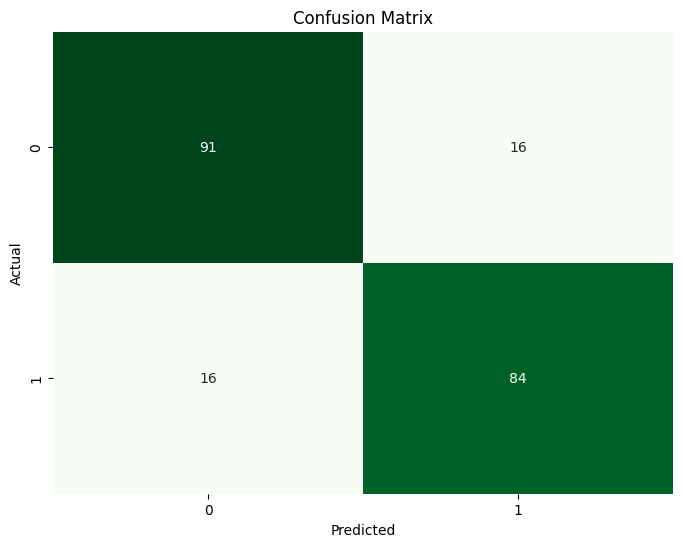

In [ ]:
import seaborn as sns

report = classification_report(y_test4, predictions4)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test4, predictions4)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Summary of Findings**

Our research began with loading two data files including patient data. These included features of DNA methylation data, disease state, gender, age, and smoking status.

By conducting Exploratory Data Analysis, we were able to check for data balance, null values, outliers, data types, data distributions, etc. and create visualizations to gain insight and understanding of the data.

In the first stage of feature selection we were able to eliminate a few features that were intuitively unneccessary such as dataset, GEO accession, and duplicate age & gender columns.

Preprocessing techniques were applied to deal with things like null values and outliers, as well as normalization.
We decided on training/testing with data at 4 stages to find the most effective data handling method.

The data was split into training and testing sets, with 70% used for training and 30% retained for use in testing/evaluation.

In the second stage of feature selection we selected the most important features based on chi-squared scores with the use of scikit learn's feature selection and selectKbest.

We chose two algorithms to evaluate (Decision Tree and Support Vector Classifier), and completed grid-search with cross-validation to find the best parameters for each.

Training was completed using the best parameters. Next, models were evaluated on the test data using accuracy score and confusion matrix.
We also took a look at the top 5 features of importance for each of the 4 data subsets used. In this we were able to see that the way the data is preprocessed changes which features have the most affect on the predictions, especially normalization.

From our evaluations we have seen that overall SVC is better at predicting the disease. By using methods of capping outliers and normalizing we were able to achieve an accuracy score of 84.5%, and precision & recall scores of 84%.